In [104]:
import pandas as pd
from scipy.stats import ttest_ind
from scipy.stats import ttest_1samp
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline  

In [147]:
import pandas as pd
pd.set_option('display.max_rows', 14)
pd.set_option('display.max_columns', 14)
pd.set_option('display.width', 1000)

# dictonary

In [124]:
sstb= {
    'layer1': [ 0.8751041487364903, 
        0.8751041487364903, 
        0.8704036825184314,
       0.8691947441215986,
       0.8692146429465615,
       0.8652390635197909,
       0.8682318771380741,
       0.8709462936469246,
       0.865200661362413,
       0.8709569533172191,
       0.8675411471113315,
       0.8688995010310345,],
    'layer2':[
        0.8716586301680078,
        0.8709756327898986,
        0.8712462949176853,
        0.8686245711703604,
        0.8698084499229431,
        0.8659722564460819,
        0.8689568158265366,
        0.8705314781432354,
        0.8491893025627798,
        0.8712889236334759,
        0.8681411542533863,
        0.8711246696759183,
    ],
    'layer11':[
        0.8689851072756325,
         0.8761167632467652,
        0.8776433872785065,
        0.8700630546673344,
        0.8721925601871401,
        0.8758276839090715,
        0.8734866955384759,
        0.8688654711883004,
        0.8705054510745232,
        0.8752192304477768,
        0.8724314606092756,
        0.8764625680797048,
    ]
    ,
    'layer12':[
        0.8718483237529701,
        0.870472141957228,
        0.8760720162646289,
        0.8681633946868166,
        0.8742275866148993,
        0.8747166414962879,
        0.8737232520869651,
        0.8780143896181578,
        0.8724611896619372,
        0.8736922869589359,
        0.874485386552514,
        0.8768074140907314
    ]

}

In [129]:
cola = {
    'layer1':[
        0.5343001138193059,
        0.5022688326295545,
        0.5209715512859253,
        0.510463005785497,
        0.5367820334111587,
        0.5075232924597609,
        0.5108235781406687,
        0.5115610675474672,
        0.4992385741342202,
        0.5209715512859253,
        0.5379847122053982,
        0.518459870748358  
    ],
    'layer2':[0.5099811691956473,
      0.5183172956405748,
      0.5214716883534575,
      0.4810120283621051,
      0.5110424605414021,
      0.49447083615802095,
      0.5076423377649488,
      0.48314426803731003,
       0.4784780470976092,
       0.5264047955738517,
       0.5101050627100728,
       0.508365554162712
      ],
    'layer11':[
        0.5290419680495485,
        0.5395372042923124,
        0.5289009468502264,
        0.513134547199089,
        0.547014428196921,
        0.5262632923748388,
        0.5286883616838448,
        0.5340435327165364,
        0.5289009468502264,
        0.5392832081618074,
        0.5392832081618074,
        0.5418955192466713
    ],
    'layer12':[
        0.5348647381812536,
        0.5233331906511532,
        0.5234063013213631,
        0.5232819075279987,
        0.5289009468502264,
        0.5286156744059349,
        0.5260499940984096,
        0.5315332344895993,
        0.5314160137547841,
        0.5421480530675332,
        0.5290419680495485,
        0.5315332344895993
    ]
    
} 

# original scores and correlated scores

In [132]:
columns=['attention_head1','attention_head2','attention_head3','attention_head4','attention_head5','attention_head6',
                    'attention_head7','attention_head8','attention_head9','attention_head10','attention_head11','attention_head12',]

In [133]:
cola_attention = pd.DataFrame.from_dict(cola, orient='index', 
            columns=columns)

In [134]:
cola_attention

,attention_head1,attention_head2,attention_head3,attention_head4,attention_head5,attention_head6,attention_head7,attention_head8,attention_head9,attention_head10,attention_head11,attention_head12
layer1,0.534300,0.502269,0.520972,0.510463,0.536782,0.507523,0.510824,0.511561,0.499239,0.520972,0.537985,0.518460
layer2,0.509981,0.518317,0.521472,0.481012,0.511042,0.494471,0.507642,0.483144,0.478478,0.526405,0.510105,0.508366
layer11,0.529042,0.539537,0.528901,0.513135,0.547014,0.526263,0.528688,0.534044,0.528901,0.539283,0.539283,0.541896
layer12,0.534865,0.523333,0.523406,0.523282,0.528901,0.528616,0.526050,0.531533,0.531416,0.542148,0.529042,0.531533


In [137]:
sstb_attention = pd.DataFrame.from_dict(sstb, orient='index',columns=columns)

In [138]:
sstb_attention

,attention_head1,attention_head2,attention_head3,attention_head4,attention_head5,attention_head6,attention_head7,attention_head8,attention_head9,attention_head10,attention_head11,attention_head12
layer1,0.875104,0.875104,0.870404,0.869195,0.869215,0.865239,0.868232,0.870946,0.865201,0.870957,0.867541,0.868900
layer2,0.871659,0.870976,0.871246,0.868625,0.869808,0.865972,0.868957,0.870531,0.849189,0.871289,0.868141,0.871125
layer11,0.868985,0.876117,0.877643,0.870063,0.872193,0.875828,0.873487,0.868865,0.870505,0.875219,0.872431,0.876463
layer12,0.871848,0.870472,0.876072,0.868163,0.874228,0.874717,0.873723,0.878014,0.872461,0.873692,0.874485,0.876807


In [15]:
sstb_base = 0.8727616207772647

In [139]:
sstb_cor = sstb_attention.applymap(lambda x: x-sstb_base)

In [140]:
sstb_cor 

,attention_head1,attention_head2,attention_head3,attention_head4,attention_head5,attention_head6,attention_head7,attention_head8,attention_head9,attention_head10,attention_head11,attention_head12
layer1,0.002343,0.002343,-0.002358,-0.003567,-0.003547,-0.007523,-0.004530,-0.001815,-0.007561,-0.001805,-0.005220,-0.003862
layer2,-0.001103,-0.001786,-0.001515,-0.004137,-0.002953,-0.006789,-0.003805,-0.002230,-0.023572,-0.001473,-0.004620,-0.001637
layer11,-0.003777,0.003355,0.004882,-0.002699,-0.000569,0.003066,0.000725,-0.003896,-0.002256,0.002458,-0.000330,0.003701
layer12,-0.000913,-0.002289,0.003310,-0.004598,0.001466,0.001955,0.000962,0.005253,-0.000300,0.000931,0.001724,0.004046


In [159]:
sstb_cor.to_csv('stsb_cor.csv')

In [141]:
cola_base =  0.5261452181661114

In [149]:
cola_cor = cola_attention.applymap(lambda x: x - cola_base)

In [153]:
pd.set_option('display.expand_frame_repr', False)

In [157]:
cola_cor.to_csv('cola_cor.csv')

In [158]:
cola_cor

,attention_head1,attention_head2,attention_head3,attention_head4,attention_head5,attention_head6,attention_head7,attention_head8,attention_head9,attention_head10,attention_head11,attention_head12
layer1,0.008155,-0.023876,-0.005174,-0.015682,0.010637,-0.018622,-0.015322,-0.014584,-0.026907,-0.005174,0.011839,-0.007685
layer2,-0.016164,-0.007828,-0.004674,-0.045133,-0.015103,-0.031674,-0.018503,-0.043001,-0.047667,0.000260,-0.016040,-0.017780
layer11,0.002897,0.013392,0.002756,-0.013011,0.020869,0.000118,0.002543,0.007898,0.002756,0.013138,0.013138,0.015750
layer12,0.008720,-0.002812,-0.002739,-0.002863,0.002756,0.002470,-0.000095,0.005388,0.005271,0.016003,0.002897,0.005388


# statistic summary

In [160]:
stsb_attention_summary = sstb_cor.describe()

In [161]:
stsb_attention_summary

,attention_head1,attention_head2,attention_head3,attention_head4,attention_head5,attention_head6,attention_head7,attention_head8,attention_head9,attention_head10,attention_head11,attention_head12
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,-0.000863,0.000406,0.001080,-0.003750,-0.001401,-0.002323,-0.001662,-0.000672,-0.008422,0.000028,-0.002112,0.000562
std,0.002505,0.002859,0.003558,0.000818,0.002304,0.005607,0.002910,0.004051,0.010555,0.002027,0.003359,0.003933
min,-0.003777,-0.002289,-0.002358,-0.004598,-0.003547,-0.007523,-0.004530,-0.003896,-0.023572,-0.001805,-0.005220,-0.003862
25%,-0.001771,-0.001912,-0.001726,-0.004252,-0.003102,-0.006973,-0.003986,-0.002647,-0.011564,-0.001556,-0.004770,-0.002193
50%,-0.001008,0.000278,0.000898,-0.003852,-0.001761,-0.002417,-0.001540,-0.002023,-0.004909,-0.000271,-0.002475,0.001032
75%,-0.000099,0.002596,0.003703,-0.003350,-0.000060,0.002233,0.000784,-0.000048,-0.001767,0.001312,0.000183,0.003787
max,0.002343,0.003355,0.004882,-0.002699,0.001466,0.003066,0.000962,0.005253,-0.000300,0.002458,0.001724,0.004046


In [162]:
sstb_layer_summary = sstb_cor.apply(pd.DataFrame.describe, axis=1)

In [163]:
sstb_layer_summary

,count,mean,std,min,25%,50%,75%,max
layer1,12.0,-0.003092,0.003164,-0.007561,-0.004702,-0.003557,-0.001813,0.002343
layer2,12.0,-0.004635,0.006195,-0.023572,-0.004258,-0.002592,-0.001607,-0.001103
layer11,12.0,0.000388,0.003092,-0.003896,-0.002367,0.000197,0.003138,0.004882
layer12,12.0,0.000962,0.002728,-0.004598,-0.000454,0.001214,0.002294,0.005253


In [119]:
sstb_layer_summary['mean']

0    -0.003092
1    -0.004635
10    0.000388
11    0.000962
Name: mean, dtype: float64

In [173]:
cola_attention_summary = cola_cor.describe()

In [174]:
cola_attention_summary

,attention_head1,attention_head2,attention_head3,attention_head4,attention_head5,attention_head6,attention_head7,attention_head8,attention_head9,attention_head10,attention_head11,attention_head12
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,0.000902,-0.005281,-0.002458,-0.019172,0.004790,-0.011927,-0.007844,-0.011075,-0.016637,0.006057,0.002959,-0.001082
std,0.011675,0.015352,0.003631,0.018167,0.015194,0.016198,0.010606,0.023541,0.025327,0.010146,0.013459,0.014692
min,-0.016164,-0.023876,-0.005174,-0.045133,-0.015103,-0.031674,-0.018503,-0.043001,-0.047667,-0.005174,-0.016040,-0.017780
25%,-0.001868,-0.011840,-0.004799,-0.023045,-0.001709,-0.021885,-0.016117,-0.021688,-0.032097,-0.001099,-0.001837,-0.010209
50%,0.005526,-0.005320,-0.003706,-0.014346,0.006696,-0.009252,-0.007708,-0.004598,-0.012075,0.006699,0.007368,-0.001149
75%,0.008296,0.001239,-0.001365,-0.010474,0.013195,0.000706,0.000564,0.006016,0.003384,0.013854,0.012164,0.007979
max,0.008720,0.013392,0.002756,-0.002863,0.020869,0.002470,0.002543,0.007898,0.005271,0.016003,0.013138,0.015750


In [175]:
cola_layer_summary = cola_cor.apply(pd.DataFrame.describe, axis =1)

In [176]:
cola_layer_summary

,count,mean,std,min,25%,50%,75%,max
layer1,12.0,-0.008533,0.013118,-0.026907,-0.016417,-0.011135,-0.001842,0.011839
layer2,12.0,-0.021942,0.016159,-0.047667,-0.034506,-0.016972,-0.013284,0.000260
layer11,12.0,0.006854,0.009076,-0.013011,0.002703,0.005398,0.013201,0.020869
layer12,12.0,0.003365,0.005459,-0.002863,-0.000756,0.002826,0.005388,0.016003


# attention plots

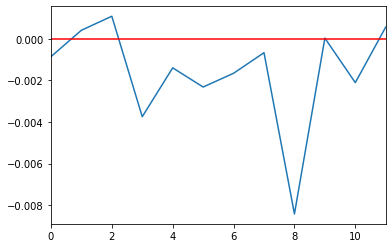

In [112]:

stsb_attention_summary.loc['mean'].plot()
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

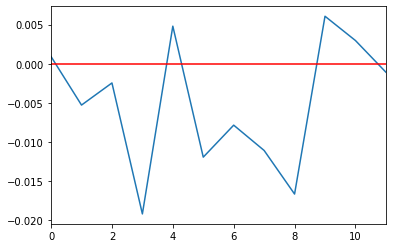

In [120]:

cola_attention_summary.loc['mean'].plot()
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

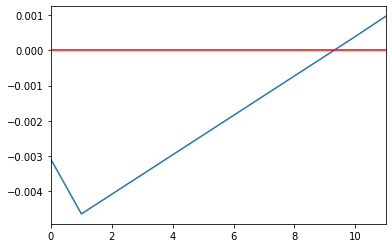

In [121]:
sstb_layer_summary['mean'].plot()
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

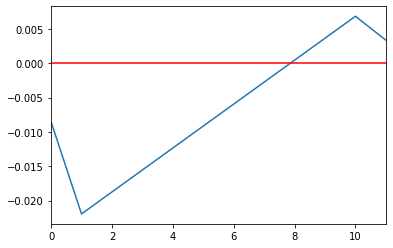

In [122]:
cola_layer_summary['mean'].plot()
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

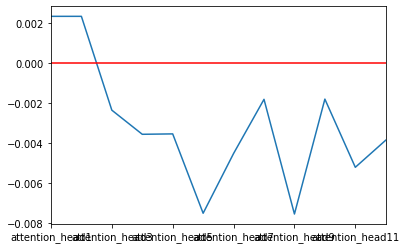

In [164]:
sstb_cor.loc['layer1'].plot()
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

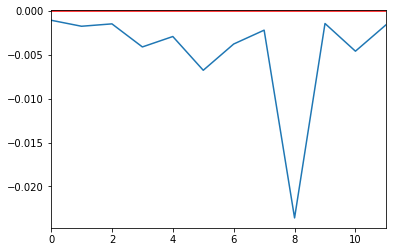

In [88]:
sstb_cor.loc[1].plot()
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

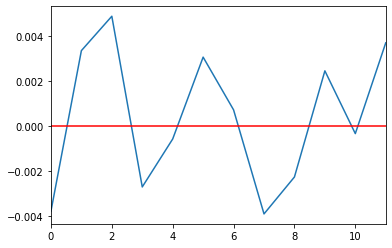

In [89]:
sstb_cor.loc[10].plot()
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

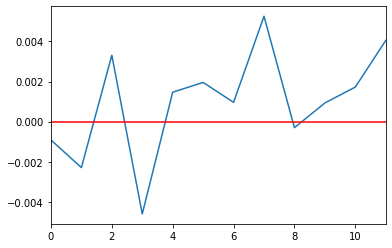

In [90]:
sstb_cor.loc[11].plot()
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

In [167]:
cola_layer_summary = cola_cor.apply(pd.DataFrame.describe, axis=1)

In [177]:
cola_layer_summary

,count,mean,std,min,25%,50%,75%,max
layer1,12.0,-0.008533,0.013118,-0.026907,-0.016417,-0.011135,-0.001842,0.011839
layer2,12.0,-0.021942,0.016159,-0.047667,-0.034506,-0.016972,-0.013284,0.000260
layer11,12.0,0.006854,0.009076,-0.013011,0.002703,0.005398,0.013201,0.020869
layer12,12.0,0.003365,0.005459,-0.002863,-0.000756,0.002826,0.005388,0.016003


In [178]:
sstb_layer_summary

,count,mean,std,min,25%,50%,75%,max
layer1,12.0,-0.003092,0.003164,-0.007561,-0.004702,-0.003557,-0.001813,0.002343
layer2,12.0,-0.004635,0.006195,-0.023572,-0.004258,-0.002592,-0.001607,-0.001103
layer11,12.0,0.000388,0.003092,-0.003896,-0.002367,0.000197,0.003138,0.004882
layer12,12.0,0.000962,0.002728,-0.004598,-0.000454,0.001214,0.002294,0.005253


In [183]:
cola_attention_summary

,attention_head1,attention_head2,attention_head3,attention_head4,attention_head5,attention_head6,attention_head7,attention_head8,attention_head9,attention_head10,attention_head11,attention_head12
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,0.000902,-0.005281,-0.002458,-0.019172,0.004790,-0.011927,-0.007844,-0.011075,-0.016637,0.006057,0.002959,-0.001082
std,0.011675,0.015352,0.003631,0.018167,0.015194,0.016198,0.010606,0.023541,0.025327,0.010146,0.013459,0.014692
min,-0.016164,-0.023876,-0.005174,-0.045133,-0.015103,-0.031674,-0.018503,-0.043001,-0.047667,-0.005174,-0.016040,-0.017780
25%,-0.001868,-0.011840,-0.004799,-0.023045,-0.001709,-0.021885,-0.016117,-0.021688,-0.032097,-0.001099,-0.001837,-0.010209
50%,0.005526,-0.005320,-0.003706,-0.014346,0.006696,-0.009252,-0.007708,-0.004598,-0.012075,0.006699,0.007368,-0.001149
75%,0.008296,0.001239,-0.001365,-0.010474,0.013195,0.000706,0.000564,0.006016,0.003384,0.013854,0.012164,0.007979
max,0.008720,0.013392,0.002756,-0.002863,0.020869,0.002470,0.002543,0.007898,0.005271,0.016003,0.013138,0.015750


In [184]:
stsb_attention_summary

,attention_head1,attention_head2,attention_head3,attention_head4,attention_head5,attention_head6,attention_head7,attention_head8,attention_head9,attention_head10,attention_head11,attention_head12
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,-0.000863,0.000406,0.001080,-0.003750,-0.001401,-0.002323,-0.001662,-0.000672,-0.008422,0.000028,-0.002112,0.000562
std,0.002505,0.002859,0.003558,0.000818,0.002304,0.005607,0.002910,0.004051,0.010555,0.002027,0.003359,0.003933
min,-0.003777,-0.002289,-0.002358,-0.004598,-0.003547,-0.007523,-0.004530,-0.003896,-0.023572,-0.001805,-0.005220,-0.003862
25%,-0.001771,-0.001912,-0.001726,-0.004252,-0.003102,-0.006973,-0.003986,-0.002647,-0.011564,-0.001556,-0.004770,-0.002193
50%,-0.001008,0.000278,0.000898,-0.003852,-0.001761,-0.002417,-0.001540,-0.002023,-0.004909,-0.000271,-0.002475,0.001032
75%,-0.000099,0.002596,0.003703,-0.003350,-0.000060,0.002233,0.000784,-0.000048,-0.001767,0.001312,0.000183,0.003787
max,0.002343,0.003355,0.004882,-0.002699,0.001466,0.003066,0.000962,0.005253,-0.000300,0.002458,0.001724,0.004046


In [181]:
cola_attention_summary.to_csv('cola_attention_summary.csv')

In [182]:
stsb_attention_summary.to_csv('stsb_attention_summary.csv')